In [1]:
#import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Define hyperparameters
input_shape = (255,255,3)
learning_rate = 0.0001
batch_size = 32
epochs = 150

In [3]:
train_data_dir =  r"C:\Users\febi2\OneDrive\Documents\PROJECTS\PROJECT 3\currency_detection_project\images\training"
validation_data_dir =  r"C:\Users\febi2\OneDrive\Documents\PROJECTS\PROJECT 3\currency_detection_project\images\validation"
img_width, img_height = 255,255
input_shape = (img_width, img_height, 3)
batch_size = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
     r"C:\Users\febi2\OneDrive\Documents\PROJECTS\PROJECT 3\currency_detection_project\images\test",
    target_size=(255, 255),
    batch_size=batch_size,
    class_mode='binary'
)

Found 1200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 192 images belonging to 2 classes.


In [4]:
# CNN model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(units=1, activation='sigmoid'))

In [5]:
# Compile the model
opt = Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# Training the model 
history = model.fit(train_generator, epochs=150, validation_data=validation_generator)
model.save('currency_detection_model.h5')

Epoch 1/150


38/38 [==============================] - 102s 3s/step - loss: 0.6896 - accuracy: 0.5058 - val_loss: 0.6932 - val_accuracy: 0.5150
Epoch 2/150
38/38 [==============================] - 115s 3s/step - loss: 0.6691 - accuracy: 0.5917 - val_loss: 0.7639 - val_accuracy: 0.4900
Epoch 3/150
38/38 [==============================] - 116s 3s/step - loss: 0.6404 - accuracy: 0.6358 - val_loss: 0.7868 - val_accuracy: 0.5150
Epoch 4/150
38/38 [==============================] - 116s 3s/step - loss: 0.6063 - accuracy: 0.6850 - val_loss: 0.6953 - val_accuracy: 0.5400
Epoch 5/150
38/38 [==============================] - 117s 3s/step - loss: 0.5987 - accuracy: 0.6792 - val_loss: 0.7272 - val_accuracy: 0.5450
Epoch 6/150
38/38 [==============================] - 116s 3s/step - loss: 0.5784 - accuracy: 0.7067 - val_loss: 0.7645 - val_accuracy: 0.5300
Epoch 7/150
38/38 [==============================] - 117s 3s/step - loss: 0.5633 - accuracy: 0.7033 - val_loss: 1.0741 - val_accuracy: 0.5100
Epoc

38/38 [==============================] - 113s 3s/step - loss: 0.1832 - accuracy: 0.8975 - val_loss: 0.5550 - val_accuracy: 0.8500
Epoch 113/150
38/38 [==============================] - 113s 3s/step - loss: 0.1759 - accuracy: 0.8942 - val_loss: 0.2247 - val_accuracy: 0.9300
Epoch 114/150
38/38 [==============================] - 114s 3s/step - loss: 0.1671 - accuracy: 0.9050 - val_loss: 0.2376 - val_accuracy: 0.9300
Epoch 115/150
38/38 [==============================] - 116s 3s/step - loss: 0.1861 - accuracy: 0.8917 - val_loss: 0.2217 - val_accuracy: 0.9150
Epoch 116/150
38/38 [==============================] - 118s 3s/step - loss: 0.1688 - accuracy: 0.9025 - val_loss: 0.2296 - val_accuracy: 0.9100
Epoch 117/150
38/38 [==============================] - 118s 3s/step - loss: 0.1644 - accuracy: 0.9042 - val_loss: 0.2474 - val_accuracy: 0.9150
Epoch 118/150
38/38 [==============================] - 109s 3s/step - loss: 0.1705 - accuracy: 0.9050 - val_loss: 0.3965 - val_accuracy: 0.9050
Epoch 

C:\Users\febi2\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
# Extract the desired variable names for plotting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
# Load the trained model
model = load_model('currency_detection_model.h5')
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)
print(f"Training Loss: {loss[-1]* 100:.2f}%")
print(f"Training Accuracy: {acc[-1]* 100:.2f}%")
print(f"Validation Accuracy: {val_acc[-1]* 100:.2f}%")

6/6 - 6s - loss: 3.6328 - accuracy: 0.5521 - 6s/epoch - 1s/step
Training Loss: 14.84%
Training Accuracy: 91.42%
Validation Accuracy: 93.50%


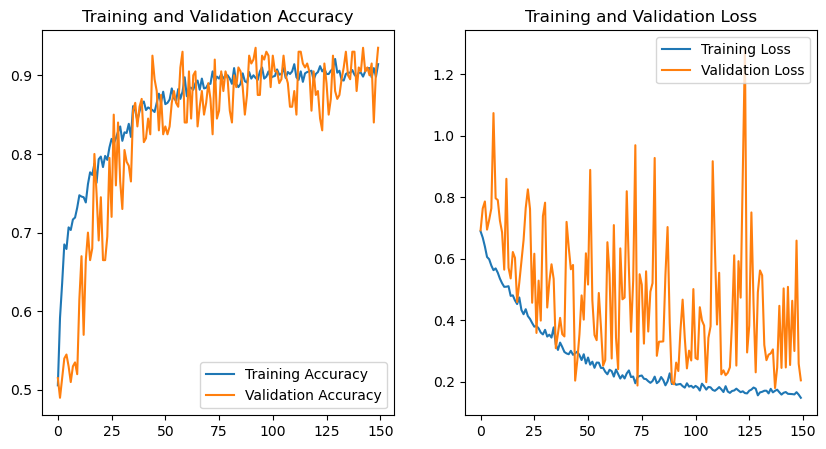

In [8]:
#Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
# Test the model
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r"C:\Users\febi2\OneDrive\Documents\PROJECTS\PROJECT 3\currency_detection_project\images\test\500\500__279.jpg", target_size=(255,255))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
train_generator.class_indices

if result[0][0] == 1:
    prediction = 'Real'
else:
    prediction = 'Fake'

print(prediction)

1/1 [==============================] - 0s 126ms/step
Real
